<a href="https://colab.research.google.com/github/DanieloSendi/Deep-Learning-Labs/blob/main/03_ConvNet1_Introduction_Working_with_own_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ConvNet 1 - Introduction, Working with own dataset**

## Part 1 Let's start with Convnet - Mnist dataset

We will use Convnet layers to classify MNIST digits, a task that you have analysed using a densely-connected network.

### 1. Import libraries

In [1]:
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

from tensorflow.keras import models
from tensorflow.keras import layers

import matplotlib.pyplot as plt

### 2. Dataset

Reuse the code from the second exercise, which has already covered the MNIST database.
Change the shape of the training testing images to tensor (60000, 28, 28, 1) and (10000, 28, 28, 1)).

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = np.float32(np.reshape(train_images, (60000, 28, 28, 1)))/255
test_images = np.float32(np.reshape(test_images, (10000, 28, 28, 1)))/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_images.shape)
print(train_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1)
(60000, 10)


### 3. Convnet architecture

A basic convnet architecture is a a stack of Conv2D and MaxPooling2D layers followed by the classification part.

A convnet takes as `input tensors of shape (image_height, image_width, image_channels)` (not including the batch dimension). In our case, we will configure our convnet to process inputs of size (28, 28, 1), which is the format of MNIST images.

- Pass the argument `input_shape=(28, 28, 1)` to our first layer
- Number of channels is controlled by the first argument passed to each Conv2D layer (here 32 or 64).
- The filters should have size 3×3.

Please implement a ConvNet architecture consisting of 3x Conv2d layers with nb. of channels: 32→64→64. Between the Conv2d should be a MaxPolling2D layer with filter:size 2×2.

In [3]:
model = models.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=train_images[0].shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=train_images[0].shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=train_images[0].shape))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

The next step would be to feed our last output tensor (of shape (3, 3, 64)) into a densely-connected `classifier network`: a stack of Dense layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. So first, we will have to flatten our 3D outputs to 1D, and then add a few Dense layers on top.

Only the <ins>last layer</ins> changes the activation function to `softmax`.

Model Summary:

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Training and evaluation

Since we are facing a multi-class classification problem the best loss function to use in this case is `categorical_crossentropy`. It measures the distance between two probability distributions: in our case, between the probability distribution output by our network, and the true distribution of the labels. By minimizing the distance between these two distributions, we train our network to output something as close as possible to the true labels.

**Parameters:**
- `rmsprop` optimizer
- `categorical_crossentropy` loss function
- `accuracy` metric

Fit the model for 5 epochs and batch size 64.

Verify your model on a test set. You should achieve test accuracy of about 0.99. Display the loss and accuracy curves on a plot.

In [5]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(train_images, train_labels,
                    batch_size=64,
                    epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 68ms/step - accuracy: 0.8727 - loss: 0.4120 - val_accuracy: 0.9804 - val_loss: 0.0628
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 61ms/step - accuracy: 0.9842 - loss: 0.0494 - val_accuracy: 0.9871 - val_loss: 0.0442
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.9903 - loss: 0.0334 - val_accuracy: 0.9880 - val_loss: 0.0405
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 59ms/step - accuracy: 0.9923 - loss: 0.0256 - val_accuracy: 0.9887 - val_loss: 0.0350
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 61ms/step - accuracy: 0.9938 - loss: 0.0194 - val_accuracy: 0.9905 - val_loss: 0.0309


In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

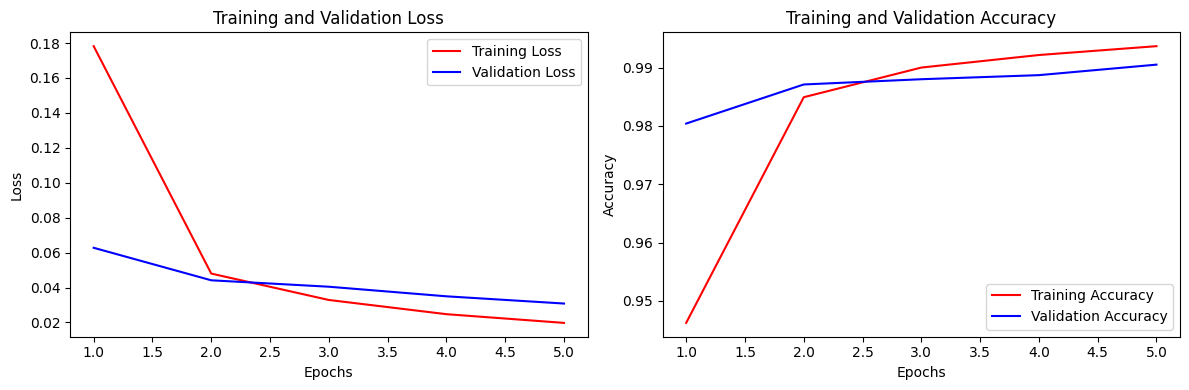

In [8]:
# Get the training history dictionary
history_dict = history_dict

# Extract training and validation loss and accuracy
training_loss = history_dict['loss']
validation_loss = history_dict['val_loss']
training_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']

plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'r-', label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, 'r-', label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9873 - loss: 0.0406
test_acc: 0.9904999732971191


## Part 2 ConvNet for small dataset

Having to train an image classification model using very little data is a common situation, which you’ll likely encounter in practice if you ever do computer vision in a professional context. A “few” samples can mean anywhere from a few hundred to a few tens of thousands of images. As a practical example, we’ll focus on classifying images as dogs or cats, in a dataset containing 4,000 pictures of cats and dogs (2,000 cats, 2,000 dogs). We’ll use 2,000 pictures for training – 1,000 for validation, and 1,000 for testing.

### 1. Import and configuration

In [10]:
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
import matplotlib.pyplot as plt

import shutil
import os
from google.colab import drive

In [11]:
# # Use below code to upload your kaggle.json to colab environment (you can download kaggle.json from your Profile->Account->API Token)
! pip install -q kaggle --quiet

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Dataset

Download the original dataset at [kaggle](https://www.kaggle.com/c/dogs-vs-cats/data) (create a Kaggle account if you don't already have one).

This original dataset contains 25,000 images of dogs and cats (12,500 from each class) and is ~800MB large (compressed). After downloading and uncompressing it, we will create a new dataset containing three subsets: a training set with 1000 samples of each class, a validation set with 500 samples of each class, and finally a test set with 500 samples of each class.

As we only need 4000 images, you do not need to download the whole dataset. You can download only train set (~500MB large).

If you use Google Colab and don't want to download the whole dataset on your computer, you can link a Kaggle account with Colab. For further information see link below: https://www.kaggle.com/general/74235

In [12]:
# Define paths
kaggle_dir = os.path.expanduser("~/.kaggle")
kaggle_creds_path = "/content/drive/MyDrive/GitHub/Deep-Learning-Lab/kaggle.json"

# Create ~/.kaggle directory if it doesn't exist
if not os.path.exists(kaggle_dir):
    os.mkdir(kaggle_dir)

# Copy kaggle.json to ~/.kaggle
shutil.copy(kaggle_creds_path, kaggle_dir)

# Set the right permissions for kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
# Define the competition name
name_of_competition = "dogs-vs-cats"

# Check if train.zip exists
if os.path.exists("train.zip"):
    print("File already exists. Skipping download.")
else:
    # Download the dataset
    print("Downloading dataset...")
    !kaggle competitions download -c {name_of_competition} -f train.zip

    # Check if the file was downloaded successfully
    if not os.path.exists("train.zip"):
        print("Failed to download train.zip. Check your Kaggle credentials or competition name.")
    else:
        print("Dataset downloaded successfully!")

# Extract the dataset if the file exists
if os.path.exists("train.zip"):
    print("Extracting dataset...")
    !unzip train.zip > /dev/null 2>&1
    print("Dataset extracted successfully!")


 98% 534M/543M [00:10<00:00, 98.2MB/s]
100% 543M/543M [00:10<00:00, 55.7MB/s]
Dataset downloaded successfully!
Extracting dataset...
Dataset extracted successfully!


After downloading the data, you have to arrange them correctly in the catalogues. Data should be split into separate catalogs for dogs and for cats. You can do it manually or in python (for example using `os` and `shutil` libraries.

```bash
main_directory/
...train/
......class_a/
.........a_image_1.jpg
.........a_image_2.jpg
......class_b/
.........b_image_1.jpg
.........b_image_2.jpg
...validation/
......class_a/
.........a_image_1.jpg
.........a_image_2.jpg
......class_b/
.........b_image_1.jpg
.........b_image_2.jpg
```

Please check the train/validation/test datasets. We now have 2000 training images, then 1000 validation images and 1000 test images (optional). In each split, there is the same number of samples from each class: this is a balanced binary classification problem, which means that classification accuracy will be an appropriate measure of success.

In [14]:
# Create directories
main_directory = "data"
subsets = ['train', 'validation', 'test']
classes = ['dog', 'cat']

for subset in subsets:
    for class_name in classes:
        os.makedirs(os.path.join(main_directory, subset, class_name), exist_ok=True)

# Move the images to corresponding directories
src_directory = 'train'

# Training data: 1000 samples of each class
for i in range(1000):
    shutil.move(os.path.join(src_directory, f'cat.{i}.jpg'), os.path.join(main_directory, 'train', 'cat'))
    shutil.move(os.path.join(src_directory, f'dog.{i}.jpg'), os.path.join(main_directory, 'train', 'dog'))

# Validation data: 500 samples of each class
for i in range(1000, 1500):
    shutil.move(os.path.join(src_directory, f'cat.{i}.jpg'), os.path.join(main_directory, 'validation', 'cat'))
    shutil.move(os.path.join(src_directory, f'dog.{i}.jpg'), os.path.join(main_directory, 'validation', 'dog'))

# Test data: 500 samples of each class
for i in range(1500, 2000):
    shutil.move(os.path.join(src_directory, f'cat.{i}.jpg'), os.path.join(main_directory, 'test', 'cat'))
    shutil.move(os.path.join(src_directory, f'dog.{i}.jpg'), os.path.join(main_directory, 'test', 'dog'))


Please check the train/validation/test datasets. We now have 2000 training images, then 1000 validation images and 1000 test images (optional). In each split, there is the same number of samples from each class: this is a balanced binary classification problem, which means that classification accuracy will be an appropriate measure of success.

### 3. Network architecture

You've already built a small convnet for MNIST in the previous exercise. You will reuse the same general structure: our convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.

However, since we are dealing with bigger images and a more complex problem, we will make our network accordingly larger: it will have one more Conv2D + MaxPooling2D stage. This serves both to augment the capacity of the network and to further reduce the size of the feature maps so that they aren't overly large when we reach the Flatten layer. Here, since we start from inputs of size 150×150 (a somewhat arbitrary choice), we end up with feature maps of size 7×7 right before the Flatten layer.

Note that the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is decreasing (from 148×148 to 7×7). This is a pattern that you will see in almost all convnets. Since we are attacking a binary classification problem, we are ending the network with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.

Create network architecture based on the information above (<ins>4x Conv2d, 4x Maxpooling layers and then Flatten, 2 x Dense layer</ins>).

Model summary should look like this:

In [15]:
model = models.Sequential()

# 4 Convolutional layers with MaxPooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

# 2 Dense layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Compilation step:
- RMSprop optimizer - with learning rate parameter(lr=1e-4)
- Binary crossentropy loss funtion
- Accuracy metric

In [16]:
#TODO: Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 4. Data preprocessing
Data preprocessing steps include the following:

- Read the picture files.
- Decode the JPEG content to RBG grids of pixels.
- Convert these into floating-point tensors.
- Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but thankfully Keras has utilities to take care of these steps automatically. It has a module with image processing helper tools, located at `tensorflow.keras.preprocessing`. In particular, it contains the class ~ImageDataGenerator~ (**In older version of tensorflow only. It is now replaced by** `image_dataset_from_directory`) which allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we will use here.

One of the useful properties of ImageDataGenerator is the ability to automatically label data based on which folder they are in. That is why, at the beginning of the exercise, we put dogs and cats into the appropriate folders.

In [17]:
# Define paths to the train and validation and test directories
train_dir = os.path.join(main_directory, 'train')
validation_dir = os.path.join(main_directory, 'validation')
test_dir = os.path.join(main_directory, 'test')

# For training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images will be resized to 150x150
    shuffle=True,
)

# For validation dataset
val_dataset = image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150),
    shuffle=True,
)

# For test dataset
test_dataset = image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150),
    shuffle=False,
)

# All images will be rescaled by 1./255
train_dataset = train_dataset.map(lambda x, y: (Rescaling(1./255)(x), y))
val_dataset = val_dataset.map(lambda x, y: (Rescaling(1./255)(x), y))
test_dataset = test_dataset.map(lambda x, y: (Rescaling(1./255)(x), y))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


### 5. Training model

Let's fit our model to the dataset. We may pass a validation_data argument.

In [18]:
history = model.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.5029 - loss: 0.7016 - val_accuracy: 0.5050 - val_loss: 0.6903
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.5596 - loss: 0.6837 - val_accuracy: 0.6500 - val_loss: 0.6466
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.6560 - loss: 0.6326 - val_accuracy: 0.6090 - val_loss: 0.6841
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6927 - loss: 0.5803 - val_accuracy: 0.7090 - val_loss: 0.5648
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.7220 - loss: 0.5458 - val_accuracy: 0.5600 - val_loss: 0.7477
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.7485 - loss: 0.5173 - val_accuracy: 0.6890 - val_loss: 0.5887
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.7555 - loss: 0.4771 - val_accuracy: 0.7330 - val_loss: 0.5690
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7946 - loss: 0.4425 - val_accu

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### 6. Outcome analysis

Plot the loss and accuracy of the model over the training and validation data during training.

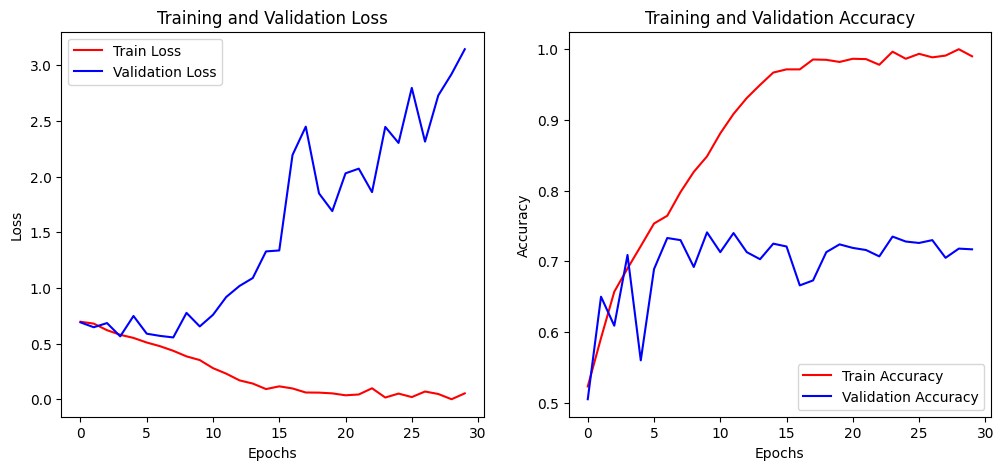

In [31]:
history_dict = history.history
training_loss = history_dict['loss']
validation_loss = history_dict['val_loss']
training_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(training_loss, label='Train Loss', color='red')
axes[0].plot(validation_loss, label='Validation Loss', color='blue')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(training_accuracy, label='Train Accuracy', color='red')
axes[1].plot(validation_accuracy, label='Validation Accuracy', color='blue')
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# plt.tight_layout()
plt.show()


In these plots, you should see that the model is overfitting. Our training accuracy increases linearly over time, until it reaches nearly 100%, while our validation accuracy stalls at 70-72%. Our validation loss reaches its minimum after only five epochs then stalls, while the training loss keeps decreasing linearly until it reaches nearly 0.

Because we only have relatively few training samples (2000), overfitting is going to be our number one concern. There are many techniques that can help mitigate overfitting, such as reducing the number of epochs, adding dropout layers dropout, or weight decay (L2 regularization).

### 7. Evaluate the model on the test data

In [28]:
test_loss, test_acc = model.evaluate(test_dataset)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 358ms/step - accuracy: 0.7139 - loss: 3.2579
Test Loss: 3.4482
Test Accuracy: 0.7020
